In [1]:
import numpy as np
from keras import models, layers, datasets, backend
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import keras

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

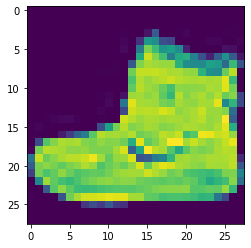

In [3]:
plt.imshow(X_train[0])

In [4]:
num_classes = 10
num_batch_size = 100
num_epochs = 50
validation_split = 0.1

In [5]:
'''
cnn을 다룰때는 1차원으로 값을 펼치지 않고, 이미지를 통으로 넣기 때문에
채널이 중요하다
흑백이미지라도 1이라는 값을 넣어줘야한다.
채널을 표현하는 방법
1) channel First 1,28,28
2) channel Last  28,28,1

여기서는 channel Last로 되어있다... ToTensor를 안 써주므로, 기존 값인 channel로 되어있고,
이것(채널)을 알아내는 방법은 backend로 알아 볼 수 있다.
'''
print(X_train.shape)
print(X_train.shape[1:])
img_rows, img_cols = X_train.shape[1:]

(60000, 28, 28)
(28, 28)


In [6]:
channel = backend.image_data_format()
channel # 이를 통해서 backend로 알아 볼 수 있다.

'channels_last'

In [7]:
if backend.image_data_format == 'chennel_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

  input_shape = (1, img_rows, img_cols)

else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

  input_shape = (img_rows, img_cols, 1)

In [8]:
X_train = X_train/255
X_test = X_test/255

Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
# model = keras.Sequential()

# # [first] CONV => RELU => CONV => RELU
# model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', input_shape = input_shape)) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

# model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.2))

# # [second] POOL layer set => CONV => RELU => CONV => RELU
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.2))

# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.2))

# # [third] POOL layer set => CONV => RELU => CONV => RELU
# # model.add(layers.MaxPool2D(pool_size=(2,2)))
# # model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu'))

# # model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu'))
# # model.add(layers.Dropout(0.25))

# model.add(layers.Flatten())
# model.add(layers.Dense(512))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))


# # model.add(layers.Dense(256)) 
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu'))
# # model.add(layers.Dropout(0.25))

# model.add(layers.Dense(64)) 
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dropout(0.5))

# # model.add(layers.Dense(32)) 
# # model.add(layers.BatchNormalization())
# # model.add(layers.Activation('relu'))

# model.add(layers.Dense(num_classes, activation='softmax'))
# model.summary() # 표로 전체적인 결과값을 볼수 있다.

In [10]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', input_shape = input_shape)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))




# model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))

# model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same'))  
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.3))

model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.33))
model.add(layers.Flatten())  
model.add(layers.Dense(512)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.4))

model.add(layers.Dense(64)) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0

In [11]:
# model = keras.Sequential()

# model.add(layers.Conv2D(32, kernel_size=(3,3),padding='same',input_shape = input_shape))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
                       
# model.add(layers.Conv2D(32,kernel_size=(3,3),padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
            

# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
                        
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(128,kernel_size=(3,3),padding='same'))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu')) 
# model.add(layers.Conv2D(128,kernel_size=(3,3),padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
                      
# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))                      
# model.add(layers.Conv2D(256,kernel_size=(3,3), padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Conv2D(256,kernel_size=(3,3), padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 

# model.add(layers.MaxPool2D(pool_size=(2,2)))
# model.add(layers.Dropout(0.25))   
# model.add(layers.Conv2D(512, kernel_size=(3,3),padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Conv2D(512,kernel_size=(3,3),padding='same'))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.25)) # FCN에서 사용한다.


# model.add(layers.Flatten()) # 1차원으로 나열해준다.
# model.add(layers.Dense(512))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.5))

# model.add(layers.Dense(128))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.25))

# model.add(layers.Dense(32))
# model.add(layers.BatchNormalization())     
# model.add(layers.Activation('relu')) 
# model.add(layers.Dropout(0.1))


# model.add(layers.Dense(num_classes, activation='softmax'))
# model.summary() # 표로 전체적인 결과값을 볼수 있다.

In [12]:
optim = keras.optimizers.Nadam(learning_rate=0.001)
# optim = keras.optimizers.Adam(learning_rate=0.0001)
# optim = keras.optimizers.RMSprop()
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optim,
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train,
                    batch_size = num_batch_size,
                    epochs = num_epochs,
                    validation_split = validation_split)

Epoch 1/50
540/540 [==============================] - 15s 21ms/step - loss: 0.5714 - accuracy: 0.8117 - val_loss: 0.3912 - val_accuracy: 0.8562
Epoch 2/50
540/540 [==============================] - 11s 20ms/step - loss: 0.2588 - accuracy: 0.9049 - val_loss: 0.2264 - val_accuracy: 0.9200
Epoch 3/50
540/540 [==============================] - 11s 20ms/step - loss: 0.2191 - accuracy: 0.9193 - val_loss: 0.2058 - val_accuracy: 0.9267
Epoch 4/50
540/540 [==============================] - 11s 20ms/step - loss: 0.1870 - accuracy: 0.9316 - val_loss: 0.2036 - val_accuracy: 0.9265
Epoch 5/50
540/540 [==============================] - 11s 20ms/step - loss: 0.1682 - accuracy: 0.9388 - val_loss: 0.1791 - val_accuracy: 0.9377
Epoch 6/50
540/540 [==============================] - 11s 20ms/step - loss: 0.1549 - accuracy: 0.9432 - val_loss: 0.2043 - val_accuracy: 0.9203
Epoch 7/50
540/540 [==============================] - 11s 20ms/step - loss: 0.1463 - accuracy: 0.9461 - val_loss: 0.1751 - val_accuracy:

In [14]:
# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    plt.savefig('Loss_Plot.png', dpi=300) # dpi해상도를 조절 할 수 있다.
    plt.show()

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])
    plt.savefig('Acc_Plot.png', dpi=300) # dpi해상도를 조절 할 수 있다.
    plt.show()

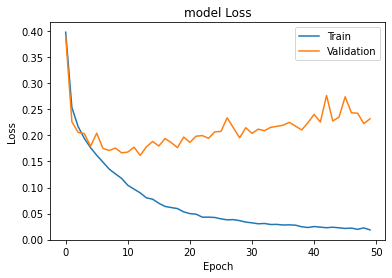

In [15]:
plot_loss(history)

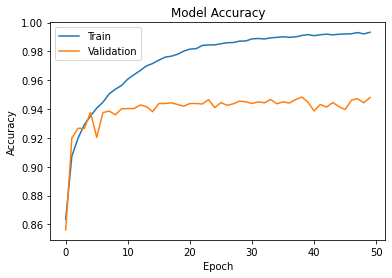

In [16]:
plot_acc(history)

In [17]:
model_performance = model.evaluate(X_test,Y_test,batch_size=num_batch_size)
print(f'loss:{model_performance[0]}, accuracy:{model_performance[1]}')
print(*model_performance)

100/100 [==============================] - 1s 6ms/step - loss: 0.2717 - accuracy: 0.9442
loss:0.27170076966285706, accuracy:0.9441999793052673
0.27170076966285706 0.9441999793052673
